# Measure the difference between OIBelevation and Swath elevation usingmachine learning methods

for "NearestPoints"

In [53]:
import pandas as pd
import numpy as np
import os, glob
from sklearn.utils import shuffle
import random
import math

In [54]:
os.getcwd()

'/Users/lipeijia'

In [55]:
path = '/Users/lipeijia/NearestPoints'

In [56]:
# load dataset
file = glob.glob(os.path.join(path, "*.csv"))

dl = []
for f in file:
    dl.append(pd.read_csv(f, index_col=None))

dataset = pd.concat(dl)

# shuffle dataset
random.seed(1)
dataset = shuffle(dataset)

# remove useless features
dataset = dataset.drop(dataset.columns[[0]], axis=1)
idx = ['DemDiff_Swath', 'DemDiffMad_Swath', 'DemDiff_SwathOverPoca', 'MeanDiffSpread_Swath']
dataset = dataset.drop(columns=idx)

# split into features and labels
dataset_X = dataset.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_Y = dataset.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)
# dataset_Y = pd.DataFrame(dataset_Y)

In [58]:
# split into train and test
cut = math.ceil(dataset.shape[0]*0.9)
train_x = dataset_X[:cut]
train_y = dataset_Y[:cut]
test_x = dataset_X[cut:]
test_y = dataset_Y[cut:]

In [59]:
print(train_x.shape, test_x.shape)

(218325, 22) (24258, 22)


## Exploratory Data Analysis

In [60]:
# remove useless features 
idx = ['PowerWatt_Swath', 'Lat_Swath', 'Lon_Swath', 'X_Swath', 'Y_Swath',
           'StartTime_Swath', 'Wf_Number_Swath']
train_x = train_x.drop(columns=idx)
test_x = test_x.drop(columns=idx)

In [47]:
# data summary
train_x.describe()

,Coh_Swath,Coh_SwathOverPoca,DayInYear_Swath,Dist_SwathToPoca,Heading_Swath,LeadEdgeS_Poca,LeadEdgeW_Poca,PhaseConfidence_Swath,PhaseSSegment_Swath,Phase_Swath,Phase_SwathOverPoca,PowerScaled_Swath,PowerScaled_SwathOverPoca,SampleNb_Swath,SampleNb_SwathMinusLeadEdgeS
count,218325.000000,218325.000000,218325.000000,218325.000000,218325.000000,218325.000000,218325.00000,218325.000000,218325.000000,218325.000000,218325.000000,218325.000000,218325.000000,218325.000000,218325.000000
mean,0.858163,0.979176,115.521534,5341.803548,82.629510,209.657531,6.21118,0.980746,-0.004327,0.200204,-0.391259,14812.381353,1.293559,427.888144,218.230613
std,0.122701,0.236421,16.339407,3353.299873,98.213228,92.661284,19.83555,0.012659,0.014231,1.834260,29.362522,12869.664316,1.239838,179.315545,163.484685
min,0.501000,0.508595,80.000000,0.000000,-13.036778,0.100000,0.10000,0.950000,-0.061400,-10.138547,-2626.536855,2501.000000,0.082988,3.000000,0.000000
25%,0.790000,0.876096,105.000000,2535.051282,-7.299698,143.400000,1.60000,0.971909,-0.011614,-1.201862,-0.635931,5426.000000,0.441977,295.000000,84.500000
50%,0.907000,0.981053,116.000000,5300.497429,-6.349345,199.400000,3.60000,0.983358,-0.004512,0.212619,0.021969,10256.000000,0.863781,402.000000,182.200000
75%,0.954000,1.045989,130.000000,7786.992487,187.097886,267.100000,5.90000,0.991289,0.006140,1.638738,0.592591,19740.000000,1.694355,545.000000,319.700000
max,0.999000,7.376923,149.000000,17858.279116,192.997767,895.800000,572.90000,0.999702,0.079767,12.094117,1446.896522,65535.000000,21.112957,1024.000000,994.000000


### data  visualization

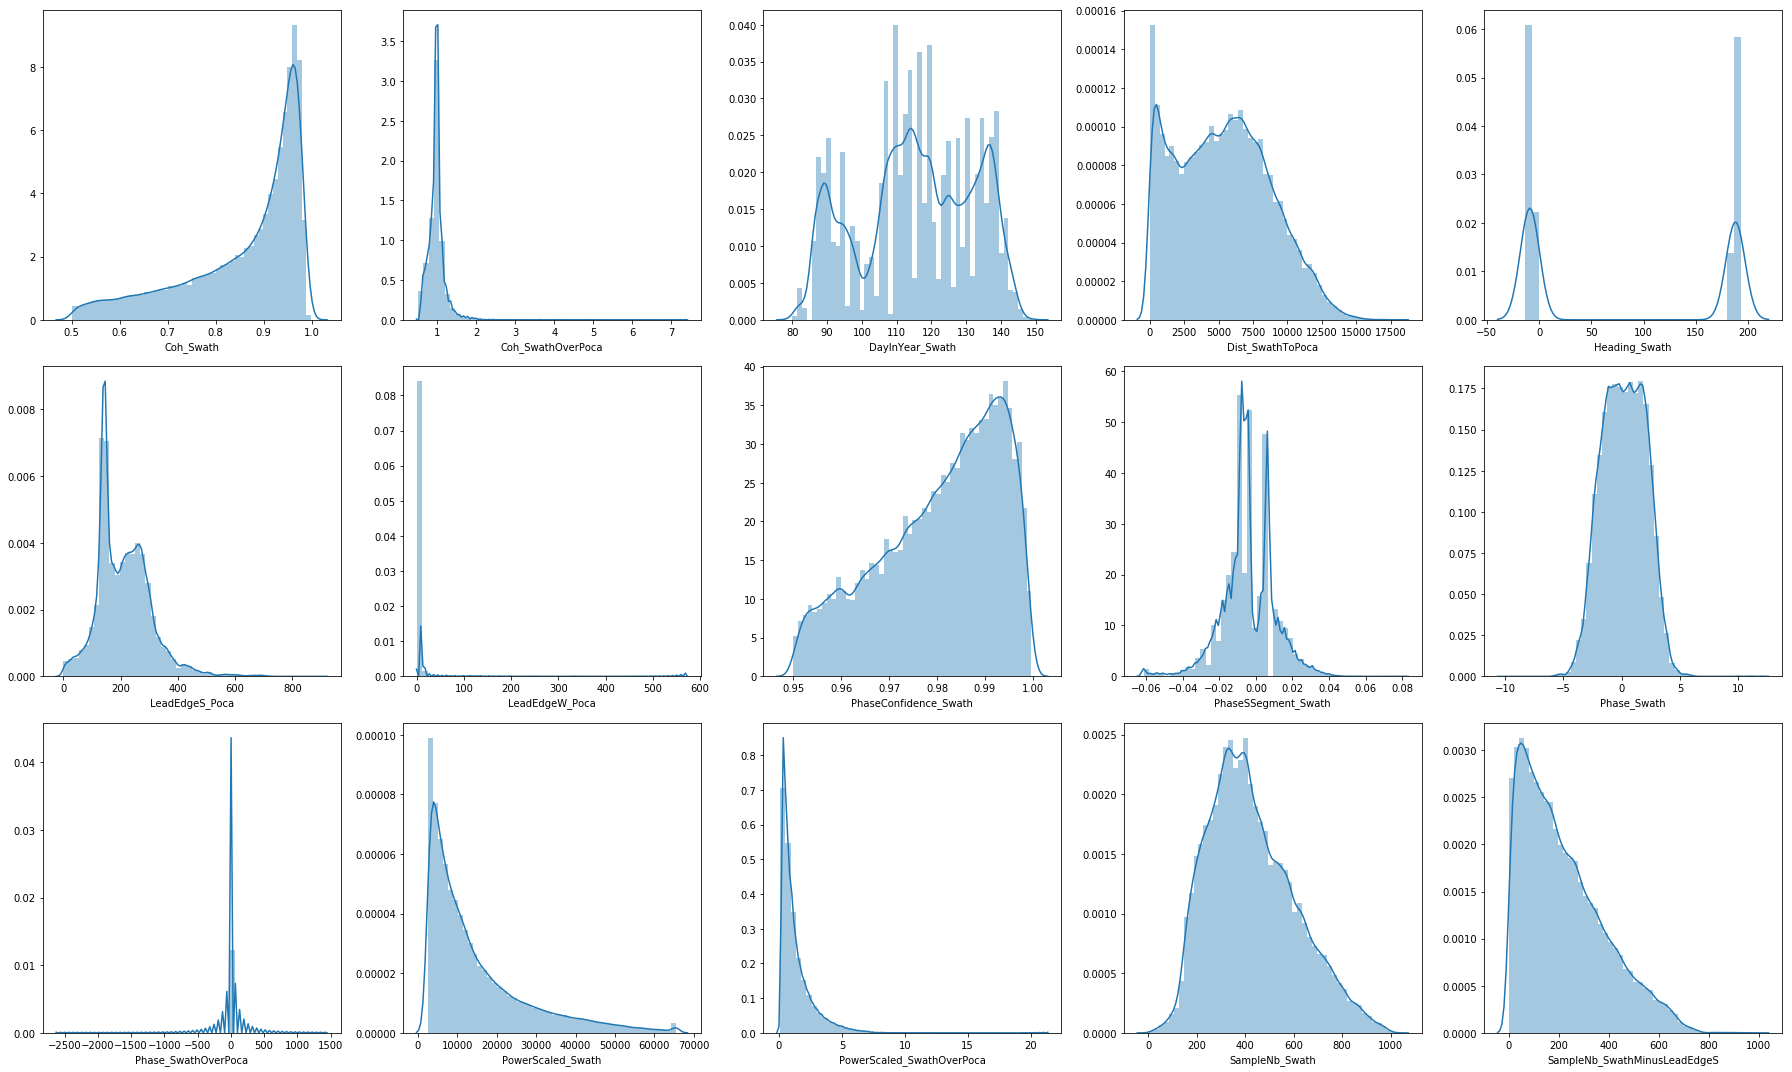

In [51]:
# density plot
import seaborn as sns
import matplotlib.pyplot as plt
variable_names = np.asarray(train_x.columns.values.tolist()).reshape(3, 5)
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
for ii in range(3):
    for jj in range(5):
        var = variable_names[ii][jj]
        sns.distplot(train_x[var], ax=ax[ii][jj], kde=True)
        ax[ii][jj].xaxis.label.set_visible(True)
fig.tight_layout()
plt.show()

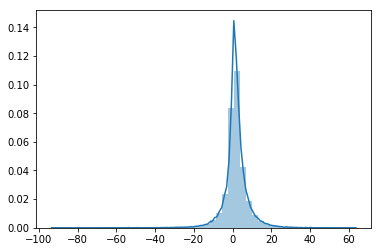

In [48]:
# density plot of lable
sns.distplot(train_y)

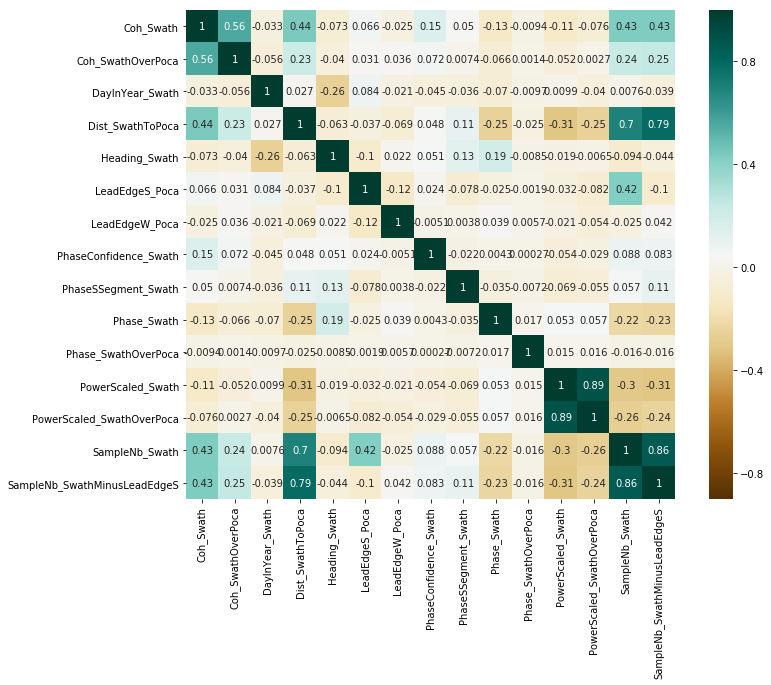

In [52]:
# heat map of correlations
cormat = train_x.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cormat, square=True, vmin=-0.9, vmax=1.0, annot=True, cmap="BrBG")
plt.show()

### feature engineering

In [61]:
from sklearn import preprocessing
from scipy.stats import skew
train_fe = train_x.copy()
test_fe = test_x.copy()

In [62]:
# transform continous variable into categorical variable
train_fe['Heading_Swath'][train_fe['Heading_Swath'] < 100] = 0
train_fe['Heading_Swath'][train_fe['Heading_Swath'] >= 100] = 1
test_fe['Heading_Swath'][test_fe['Heading_Swath'] < 100] = 0
test_fe['Heading_Swath'][test_fe['Heading_Swath'] >= 100] = 1

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing 

In [63]:
# using log for skwed features
skewness = train_fe.apply(lambda x: skew(x))
skewness_features = skewness[np.abs(skewness >= 0.75)].index
train_fe[skewness_features] = np.log1p(train_fe[skewness_features])
test_fe[skewness_features] = np.log1p(test_fe[skewness_features])

# centre data
index1 = np.asarray(train_fe.columns.values.tolist())
index1 = ['Coh_Swath', 'Coh_SwathOverPoca', 'DayInYear_Swath',
       'Dist_SwathToPoca', 'LeadEdgeS_Poca',
       'LeadEdgeW_Poca', 'PhaseConfidence_Swath', 'PhaseSSegment_Swath',
       'Phase_Swath', 'Phase_SwathOverPoca', 'PowerScaled_Swath',
       'PowerScaled_SwathOverPoca', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS']
for i in index1:
    train_fe[i] = (train_fe[i]-np.mean(train_fe[i]))/np.std(train_fe[i])
    test_fe[i] = (test_fe[i] - np.mean(test_fe[i]))/np.std(test_fe[i])

In [36]:
# check the results
train_fe.head(10)

,Coh_Swath,Coh_SwathOverPoca,DayInYear_Swath,Dist_SwathToPoca,Heading_Swath,LeadEdgeS_Poca,LeadEdgeW_Poca,PhaseConfidence_Swath,PhaseSSegment_Swath,Phase_Swath,Phase_SwathOverPoca,PowerScaled_Swath,PowerScaled_SwathOverPoca,SampleNb_Swath,SampleNb_SwathMinusLeadEdgeS
3077,0.789210,0.062368,1.192119,0.835874,1.0,-0.849987,0.658297,-0.249863,0.950783,1.045231,-0.033947,-0.086786,-0.439183,0.223695,0.823976
8771,0.495814,0.033819,1.681734,1.027401,1.0,-0.463731,1.068234,0.527145,0.485971,1.454432,-0.066815,-0.585831,-0.747854,-0.322829,0.405245
7008,0.829960,0.195295,0.824907,1.007544,0.0,-0.321155,0.768244,0.379342,-0.013045,-0.721469,0.000152,-0.170544,-0.935115,2.499019,1.502019
11074,0.675112,0.989921,-0.399130,0.662934,0.0,1.162738,-1.075973,-2.118528,0.519611,0.231118,0.005889,-0.540184,-0.412109,0.881754,0.423875
1581,0.895159,0.596369,1.436926,0.387502,0.0,0.527552,-1.011219,0.457273,-0.013045,0.204601,0.018877,-0.469864,-0.313301,2.136528,1.265673
24881,0.699561,0.562463,1.069715,1.253617,0.0,0.378923,0.995341,-1.671354,-0.262562,-1.072409,-0.009293,-0.906556,-1.159040,0.647530,0.715863
7051,0.895159,0.295895,1.314522,0.369328,0.0,0.692072,0.074714,-0.568549,-0.127148,0.216222,0.018910,1.035300,1.200876,-0.060721,-0.025449
9205,-1.215667,-1.128641,-1.439562,0.660189,1.0,-0.713296,1.266475,0.570254,0.304025,0.480402,0.021494,1.348750,1.522680,0.073122,0.721272
7456,0.683261,0.090597,1.314522,-0.345972,0.0,0.115802,-0.325722,1.077251,-0.512094,0.776506,0.028874,0.077305,-0.069970,-0.451095,0.006910
13856,-0.099130,-0.302889,0.580100,-1.232145,1.0,-0.903237,0.159100,-0.158528,-1.260837,1.735424,0.054058,0.633547,0.681540,-1.242997,-0.438837


In [37]:
# check the results
train_x.head(10)

,Coh_Swath,Coh_SwathOverPoca,DayInYear_Swath,Dist_SwathToPoca,Heading_Swath,LeadEdgeS_Poca,LeadEdgeW_Poca,PhaseConfidence_Swath,PhaseSSegment_Swath,Phase_Swath,Phase_SwathOverPoca,PowerScaled_Swath,PowerScaled_SwathOverPoca,SampleNb_Swath,SampleNb_SwathMinusLeadEdgeS
3077,0.955,0.980493,135,8144.731917,186.497021,116.2,6.3,0.977583,0.009204,2.117424,-1.388019,9845.0,0.696104,468,351.8
8771,0.919,0.974549,143,8786.980483,190.486257,144.1,8.8,0.987419,0.002589,2.868003,-2.353115,6528.0,0.480849,370,225.9
7008,0.960,1.008403,129,8720.393110,-10.371038,156.0,6.9,0.985548,-0.004512,-1.123154,-0.386784,9189.0,0.363806,876,720.0
11074,0.941,1.183648,109,7564.813613,-7.180683,355.6,1.1,0.953926,0.003068,0.624133,-0.218337,6778.0,0.716415,586,230.4
1581,0.968,1.095023,139,6641.209830,-6.350545,250.0,1.2,0.986535,-0.004512,0.575494,0.163017,7182.0,0.792628,811,561.0
24881,0.944,1.087558,133,9545.547915,-11.376354,230.2,8.3,0.959587,-0.008063,-1.766869,-0.664127,5013.0,0.235928,544,313.8
7051,0.968,1.029787,137,6580.267624,-11.763426,273.9,3.8,0.973548,-0.006136,0.596809,0.163992,24797.0,2.488409,417,143.1
9205,0.709,0.747102,92,7555.610631,186.971746,125.4,10.3,0.987965,0.000000,1.081384,0.239854,32097.0,3.018621,441,315.6
7456,0.942,0.986387,137,4181.657327,-11.864181,198.9,2.6,0.994383,-0.011614,1.624513,0.456562,11269.0,0.995055,347,148.1
13856,0.846,0.905782,125,1210.061982,187.054874,112.8,4.1,0.978739,-0.022269,3.383413,1.196020,17814.0,1.776249,205,92.2


## baseline: linear regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(train_fe, train_y)
pred_y_reg_train = reg.predict(train_fe)
pred_y_reg = reg.predict(test_fe)
rmse_reg_trian = np.sqrt(mean_squared_error(train_y, pred_y_reg_train))
rmse_reg = np.sqrt(mean_squared_error(test_y, pred_y_reg))
print(rmse_reg_trian, rmse_reg)

6.239924970011795 6.177285503336656


## svr

In [13]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [42]:
svr = SVR(kernel='rbf', C=100, gamma=0.0008,epsilon=0.001)
fit = svr.fit(train_fe, train_y)
pred = fit.predict(train_fe)
pred_test = fit.predict(test_fe)
rmse_trian = np.sqrt(mean_squared_error(pred, train_y))
rmse_test = np.sqrt(mean_squared_error(pred_test, test_y))
print(rmse_trian, rmse_test)

6.046334182879274 5.979349601705916


In [29]:
# hyperparameter selection
from sklearn.model_selection import  RandomizedSearchCV
para_distr = {"C": [1e-3,1e-2,0.1, 1, 10, 100, 1000],
             "gamma":[x/10000 for x in np.arange(1,20,1)],
             "epsilon": [x/1000 for x in np.arange(1,10,1)]}
clf_svr = RandomizedSearchCV(SVR('rbf'), para_distr, n_iter=10, scoring="neg_mean_squared_error",cv=3)
clf_svr.fit(train_fe,train_y)
print('beat parameters：{0}'.format(clf_svr.best_params_))
print('RMSE:{0}'.format(np.sqrt(-clf_svr.best_score_)))

beat parameters：{'gamma': 0.0008, 'epsilon': 0.001, 'C': 100}
RMSE:6.163261784233005


## xgboost

In [81]:
from xgboost import XGBRegressor
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [82]:
xgb = XGBRegressor(learning_rate=0.1,
                   n_estimators=600,
                   max_depth=10,
                   min_child_weight=1,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.2,
                   reg_alpha=2,
                   reg_lambda=1).fit(train_fe, train_y)

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:23:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
pred_y_train = xgb.predict(train_fe)
pred_y = xgb.predict(test_fe)
rmse_xgb_train = np.sqrt(mean_squared_error(train_y, pred_y_train))
rmse_xgb = np.sqrt(mean_squared_error(test_y, pred_y))
print(rmse_xgb_train,rmse_xgb)

1.1700459292835867 2.7715500174731735


In [239]:
from sklearn.model_selection import GridSearchCV
paras = {# 'n_estimators': np.arange(500,700,50),
         # 'max_depth': [5,6,7,8,9,10],
         # 'min_child_weidht': [1,2,3,4,5,6]
         # 'gamma': np.arange(0.1,1,0.1)
         # 'subsample': [0.6,0.7,0.8,0.9]
         # 'colsample_bytree':[0.6,0.7,0.8,0.9]
         # 'reg_alpha': [0.05, 0.1, 1, 2, 3],
         # 'reg_lambda': [0.05, 0.1, 1, 2, 3]
         # 'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

clf_xgb = GridSearchCV(XGBRegressor(n_estimators=600,
                                    max_depth=10,
                                    min_child_weight=1,
                                    gamma=0.2,
                                    reg_alpha=2,
                                    reg_lambda=1,
                                    subsample=0.8,
                                    learning_rate=0.1),
                       paras, scoring="neg_mean_squared_error",
                       cv=5)
clf_xgb.fit(train_fe,train_y)
print('beat parameters：{0}'.format(clf_xgb.best_params_))
print('RMSE:{0}'.format(np.sqrt(-clf_xgb.best_score_)))

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:03:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:06:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:07:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:08:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:10:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:12:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:15:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:16:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:23:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:25:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:27:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:31:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:33:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:35:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:37:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
beat parameters：{'colsample_bytree': 0.8}
RMSE:3.320157627028492


## mlp

In [84]:
import torch
import torch.nn as nn

In [85]:
n_features = train_x.shape[1]
train_X = torch.tensor(train_fe.values,
                       dtype=torch.float)
train_Y = torch.tensor(train_y.values, dtype=torch.float)
train_Y = torch.unsqueeze(train_Y, dim=1)

In [71]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 60)
        self.fc2 = nn.Linear(60, 120)
        self.fc3 = nn.Linear(120, 30)
        self.out = nn.Linear(30, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.out(x)
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=15, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=1, bias=True)
)


In [72]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_function = torch.nn.MSELoss()

for step in range(5000):
    pred = net(train_X)
    loss = loss_function(pred, train_Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(loss)

tensor(12.8758, grad_fn=<MseLossBackward>)


In [76]:
test_XX = torch.tensor(test_fe.values, dtype=torch.float)
prediction = net(test_XX)

In [78]:
test_YY = torch.tensor(test_y.values, dtype=torch.float)
cost = loss_function(prediction, test_YY)
cost

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([24258])) that is different to the input size (torch.Size([24258, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(65.4853, grad_fn=<MseLossBackward>)

In [75]:
print(torch.sqrt(loss))

tensor(3.5883, grad_fn=<SqrtBackward>)


In [79]:
print(torch.sqrt(cost))

tensor(8.0923, grad_fn=<SqrtBackward>)


## transform ability experiment

### set data group

In [112]:
file_jak = glob.glob(os.path.join(path, "jakobshavn*"))

dl = []
for f in file_jak:
    dl.append(pd.read_csv(f, index_col=None))

dataset_jak = pd.concat(dl)

# remove useless features
dataset_jak = dataset_jak.drop(dataset_jak.columns[[0]], axis=1)
idx = ['DemDiff_Swath', 'DemDiffMad_Swath', 'DemDiff_SwathOverPoca', 'MeanDiffSpread_Swath']
dataset_jak = dataset_jak.drop(columns=idx)

# split into features and labels
dataset_jak_x = dataset_jak.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_jak_y = dataset_jak.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)
# dataset_Y = pd.DataFrame(dataset_Y)

In [113]:
file_sou = glob.glob(os.path.join(path, "southeast*"))

dl = []
for f in file_sou:
    dl.append(pd.read_csv(f, index_col=None))

dataset_sou = pd.concat(dl)

# remove useless features
dataset_sou = dataset_sou.drop(dataset_sou.columns[[0]], axis=1)
idx = ['DemDiff_Swath', 'DemDiffMad_Swath', 'DemDiff_SwathOverPoca', 'MeanDiffSpread_Swath']
dataset_sou = dataset_sou.drop(columns=idx)

# split into features and labels
dataset_sou_x = dataset_sou.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_sou_y = dataset_sou.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)

In [116]:
file_sto = glob.glob(os.path.join(path, "storstrommen*"))

dl = []
for f in file_sto:
    dl.append(pd.read_csv(f, index_col=None))

dataset_sto = pd.concat(dl)

# remove useless features
dataset_sto = dataset_sto.drop(dataset_sto.columns[[0]], axis=1)
idx = ['DemDiff_Swath', 'DemDiffMad_Swath', 'DemDiff_SwathOverPoca', 'MeanDiffSpread_Swath']
dataset_sto = dataset_sto.drop(columns=idx)

# split into features and labels
dataset_sto_x = dataset_sto.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_sto_y = dataset_sto.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)

### spatial ability, here the sample is southeast and jakobshavn for storstrommen

In [145]:
train_tf_x = pd.concat([dataset_sou_x,dataset_jak_x],axis=0)

In [147]:
train_ss_y = pd.concat([dataset_sou_y,dataset_jak_y])

In [149]:
# the same feature engineering

train_tf = train_tf_x.copy()
test_tf = dataset_sto_x.copy()

idx = ['PowerWatt_Swath', 'Lat_Swath', 'Lon_Swath', 'X_Swath', 'Y_Swath',
           'StartTime_Swath', 'Wf_Number_Swath']
train_tf = train_tf.drop(columns=idx)
test_tf = test_tf.drop(columns=idx)

train_tf['Heading_Swath'][train_tf['Heading_Swath'] < 100] = 0
train_tf['Heading_Swath'][train_tf['Heading_Swath'] >= 100] = 1
test_tf['Heading_Swath'][test_tf['Heading_Swath'] < 100] = 0
test_tf['Heading_Swath'][test_tf['Heading_Swath'] >= 100] = 1

skewness = train_tf.apply(lambda x: skew(x))
skewness_features = skewness[np.abs(skewness >= 0.75)].index
train_tf[skewness_features] = np.log1p(train_tf[skewness_features])
test_tf[skewness_features] = np.log1p(test_tf[skewness_features])

index1 = np.asarray(train_tf.columns.values.tolist())
index1 = ['Coh_Swath', 'Coh_SwathOverPoca', 'DayInYear_Swath',
       'Dist_SwathToPoca', 'LeadEdgeS_Poca',
       'LeadEdgeW_Poca', 'PhaseConfidence_Swath', 'PhaseSSegment_Swath',
       'Phase_Swath', 'Phase_SwathOverPoca', 'PowerScaled_Swath',
       'PowerScaled_SwathOverPoca', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS']
for i in index1:
    train_tf[i] = (train_tf[i]-np.mean(train_tf[i]))/np.std(train_tf[i])
    test_tf[i] = (test_tf[i] - np.mean(test_tf[i]))/np.std(test_tf[i])

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by Interactiv

In [150]:
# fit our best model: XGBoost
xgb_tf = XGBRegressor(learning_rate=0.1,
                   n_estimators=600,
                   max_depth=10,
                   min_child_weight=1,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.2,
                   reg_alpha=2,
                   reg_lambda=1).fit(train_tf, train_ss_y)

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:13:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [152]:
pred_y_tf = xgb_tf.predict(test_tf[:test_fe.shape[0]])
rmse_xgb_tf = np.sqrt(mean_squared_error(dataset_sto_y[:test_fe.shape[0]], pred_y_tf))
print(rmse_xgb_tf)

6.054567215187271


### temporal ability, here the sample is for jakobshavn

In [155]:
dataset_jak.sort_values(by="StartTime_Swath" , ascending=True)
dataset_sto.sort_values(by="StartTime_Swath" , ascending=True)
dataset_sou.sort_values(by="StartTime_Swath" , ascending=True)

,Coh_Swath,Coh_SwathOverPoca,DayInYear_Swath,Dist_SwathToPoca,Elev_Oib,Elev_Swath,Heading_Swath,Lat_Swath,LeadEdgeS_Poca,LeadEdgeW_Poca,...,Phase_SwathOverPoca,PowerScaled_Swath,PowerScaled_SwathOverPoca,PowerWatt_Swath,SampleNb_Swath,SampleNb_SwathMinusLeadEdgeS,StartTime_Swath,Wf_Number_Swath,X_Swath,Y_Swath
3361,0.629,1.209615,93,6309.465904,2242.1068,2241.160143,186.355645,64.076555,314.9,1.9,...,0.539557,26486.0,2.377985,2.047526e-15,325,10.1,1301796980,1411,118689,-2852721
2513,0.977,1.177108,93,6364.872426,2209.4909,2209.114498,186.322057,63.742772,167.8,4.6,...,0.214288,23336.0,1.501383,1.244221e-15,585,417.2,1301796980,1534,121821,-2890646
2512,0.976,1.104072,93,6658.487591,2213.0713,2207.435019,186.322324,63.745454,178.2,6.7,...,0.208030,13211.0,0.784967,7.537641e-16,603,424.8,1301796980,1533,121829,-2890340
2511,0.962,1.088235,93,6596.358768,2215.3032,2209.111896,186.322324,63.745512,178.2,6.7,...,0.215332,11217.0,0.666488,6.399948e-16,597,418.8,1301796980,1533,121767,-2890336
2510,0.976,1.104072,93,6658.487591,2213.3376,2207.435019,186.322324,63.745454,178.2,6.7,...,0.208030,13211.0,0.784967,7.537641e-16,603,424.8,1301796980,1533,121829,-2890340
2509,0.967,1.093891,93,6693.543307,2211.6818,2208.452954,186.322324,63.745421,178.2,6.7,...,0.203846,12622.0,0.749970,7.201582e-16,598,419.8,1301796980,1533,121864,-2890342
2508,0.979,1.107466,93,6613.387710,2215.5673,2213.487807,186.322324,63.745496,178.2,6.7,...,0.213355,11811.0,0.701783,6.738860e-16,578,399.8,1301796980,1533,121784,-2890337
2507,0.976,1.104072,93,6676.514360,2213.6043,2206.418544,186.322324,63.745437,178.2,6.7,...,0.205860,14392.0,0.855140,8.211470e-16,607,428.8,1301796980,1533,121847,-2890341
2506,0.983,1.111991,93,6791.791590,2208.3880,2203.115382,186.322324,63.745328,178.2,6.7,...,0.192125,20500.0,1.218063,1.169644e-15,619,440.8,1301796980,1533,121962,-2890349
2505,0.974,1.101810,93,6716.625120,2211.8436,2209.523285,186.322324,63.745399,178.2,6.7,...,0.201066,14545.0,0.864231,8.298765e-16,593,414.8,1301796980,1533,121887,-2890344


In [183]:
# split into features and labels
dataset_sto_x = dataset_sto.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_sto_y = dataset_sto.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)

# split into features and labels
dataset_sou_x = dataset_sou.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_sou_y = dataset_sou.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)

# split into features and labels
dataset_jak_x = dataset_jak.drop(['Elev_Oib', 'Elev_Swath'], axis=1)
dataset_jak_y = dataset_jak.apply(lambda x: x['Elev_Oib'] - x['Elev_Swath'], axis=1)

In [192]:
cut_time = math.ceil(dataset_jak_x.shape[0]*0.9)
train_x_time = dataset_jak_x[:cut_time]
train_y_time = dataset_jak_y[:cut_time]
test_x_time = dataset_jak_x[cut_time:]
test_y_time = dataset_jak_y[cut_time:]

In [194]:
train_tf = train_x_time.copy()
test_tf = test_x_time.copy()

idx = ['PowerWatt_Swath', 'Lat_Swath', 'Lon_Swath', 'X_Swath', 'Y_Swath',
           'StartTime_Swath', 'Wf_Number_Swath']
train_tf = train_tf.drop(columns=idx)
test_tf = test_tf.drop(columns=idx)

train_tf['Heading_Swath'][train_tf['Heading_Swath'] < 100] = 0
train_tf['Heading_Swath'][train_tf['Heading_Swath'] >= 100] = 1
test_tf['Heading_Swath'][test_tf['Heading_Swath'] < 100] = 0
test_tf['Heading_Swath'][test_tf['Heading_Swath'] >= 100] = 1

skewness = train_tf.apply(lambda x: skew(x))
skewness_features = skewness[np.abs(skewness >= 0.75)].index
train_tf[skewness_features] = np.log1p(train_tf[skewness_features])
test_tf[skewness_features] = np.log1p(test_tf[skewness_features])

index1 = np.asarray(train_tf.columns.values.tolist())
index1 = ['Coh_Swath', 'Coh_SwathOverPoca', 'DayInYear_Swath',
       'Dist_SwathToPoca', 'LeadEdgeS_Poca',
       'LeadEdgeW_Poca', 'PhaseConfidence_Swath', 'PhaseSSegment_Swath',
       'Phase_Swath', 'Phase_SwathOverPoca', 'PowerScaled_Swath',
       'PowerScaled_SwathOverPoca', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS']
for i in index1:
    train_tf[i] = (train_tf[i]-np.mean(train_tf[i]))/np.std(train_tf[i])
    test_tf[i] = (test_tf[i] - np.mean(test_tf[i]))/np.std(test_tf[i])

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by Interactiv

In [195]:
xgb_tf = XGBRegressor(learning_rate=0.1,
                   n_estimators=600,
                   max_depth=10,
                   min_child_weight=1,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   gamma=0.2,
                   reg_alpha=2,
                   reg_lambda=1).fit(train_tf, train_y_time)

/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/lipeijia/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:55:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [197]:
pred_y_tf = xgb_tf.predict(test_tf)
rmse_xgb_tf = np.sqrt(mean_squared_error(test_y_time, pred_y_tf))
print(rmse_xgb_tf)

6.865495045098609
